In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_pickle('uber_2018-12.pkl')

In [33]:
print(df.shape)
df.head()


(18934454, 12)


,year,month,day,hour,utc_timestamp,segment_id,start_junction_id,end_junction_id,speed_mph_mean,speed_mph_stddev,dow,dow_words
0,2018,12,9,13,2018-12-09T18:00:00.000Z,96c556b9b741484c5a14d225f501a435e2bef133,53dfa64f19673d5c74bd043f5e285136bc74d0bc,bf5bb1427013b8e37ef45d6c31d6b9b76128eb5f,9.850,6.515,6,Sunday
1,2018,12,12,21,2018-12-13T02:00:00.000Z,96c556b9b741484c5a14d225f501a435e2bef133,53dfa64f19673d5c74bd043f5e285136bc74d0bc,bf5bb1427013b8e37ef45d6c31d6b9b76128eb5f,9.953,6.308,2,Wednesday
2,2018,12,13,1,2018-12-13T06:00:00.000Z,96c556b9b741484c5a14d225f501a435e2bef133,53dfa64f19673d5c74bd043f5e285136bc74d0bc,bf5bb1427013b8e37ef45d6c31d6b9b76128eb5f,18.154,10.063,3,Thursday
3,2018,12,16,17,2018-12-16T22:00:00.000Z,96c556b9b741484c5a14d225f501a435e2bef133,53dfa64f19673d5c74bd043f5e285136bc74d0bc,bf5bb1427013b8e37ef45d6c31d6b9b76128eb5f,8.658,6.216,6,Sunday
4,2018,12,19,5,2018-12-19T10:00:00.000Z,96c556b9b741484c5a14d225f501a435e2bef133,53dfa64f19673d5c74bd043f5e285136bc74d0bc,bf5bb1427013b8e37ef45d6c31d6b9b76128eb5f,17.398,6.963,2,Wednesday


In [6]:
df = df.drop_duplicates()

In [9]:
segments = pd.read_csv('movement-segments-to-osm-ways-new-york-2018.csv')

In [11]:
subsegments = pd.read_pickle('osmways.pkl')

In [14]:
subsegments.head()

,osm_way_id,osmstartnode,osmendnode,osmname,start,end,seg_order,reverse,angle,distance
0,5669636,370705004,1369956654,None,"(-74.0048445, 40.7124759)","(-74.0048533, 40.71245)",0,False,1.243265,2.970722
1,5669636,370705004,1369956654,None,"(-74.0048533, 40.71245)","(-74.0048604, 40.7124243)",1,False,1.301255,2.916321
2,5669636,370705004,1369956654,None,"(-74.0048604, 40.7124243)","(-74.0048578, 40.7123974)",2,False,1.667151,2.995269
3,5669636,370705004,1369956654,None,"(-74.0048578, 40.7123974)","(-74.0048468, 40.7123722)",3,False,1.982374,2.948748
4,5669636,370705004,1369956654,None,"(-74.0048468, 40.7123722)","(-74.0048252, 40.7123472)",4,False,2.283362,3.322451


In [54]:
orsapi_key = ''

In [55]:
import openrouteservice
from_loc = 'Empire State Building, New York'
to_loc = 'Central Park, Manhattan'
client = openrouteservice.Client(key=orsapi_key)  #Specify your personal API key
empire_state = client.pelias_search(
    from_loc)['features'][0]['geometry']['coordinates']
central_park = client.pelias_search(
    to_loc)['features'][0]['geometry']['coordinates']
coords = (empire_state, central_park)
routes = client.directions(coords)

print(routes)

{'bbox': [-73.985492, 40.74649, -73.959311, 40.783674], 'routes': [{'summary': {'distance': 5597.6, 'duration': 457.9}, 'segments': [{'distance': 5597.6, 'duration': 457.9, 'steps': [{'distance': 118.4, 'duration': 14.2, 'type': 11, 'instruction': 'Head southwest on 5th Avenue', 'name': '5th Avenue', 'way_points': [0, 2]}, {'distance': 154.2, 'duration': 18.5, 'type': 0, 'instruction': 'Turn left onto East 32nd Street', 'name': 'East 32nd Street', 'way_points': [2, 5]}, {'distance': 325.4, 'duration': 39.1, 'type': 0, 'instruction': 'Turn left onto Madison Avenue', 'name': 'Madison Avenue', 'way_points': [5, 12]}, {'distance': 164.8, 'duration': 11.9, 'type': 1, 'instruction': 'Turn right onto East 36th Street', 'name': 'East 36th Street', 'way_points': [12, 14]}, {'distance': 261.2, 'duration': 26.9, 'type': 0, 'instruction': 'Turn left onto Park Avenue', 'name': 'Park Avenue', 'way_points': [14, 18]}, {'distance': 3433.7, 'duration': 247.2, 'type': 12, 'instruction': 'Keep left onto 

In [56]:
from openrouteservice import convert


# decode_polyline needs the geometry only
geometry = client.directions(coords)['routes'][0]['geometry']

decoded = convert.decode_polyline(geometry)

print(len(decoded['coordinates']))

118


In [59]:
from openrouteservice import convert
#coords = ((8.34234,48.23424),(8.34423,48.26424))


# decode_polyline needs the geometry only
geometry = client.directions(coords)['routes'][0]['geometry']

decoded = convert.decode_polyline(geometry)

coord = decoded['coordinates']

In [60]:
from ipyleaflet import Map, basemaps, basemap_to_tiles, GeoJSON
m = Map(center=((coords[0][1]+coords[1][1])/2,(coords[0][0]+coords[1][0])/2), zoom=13)
geo_json = GeoJSON(data=decoded, style = {'color': 'red'})
m.add_layer(geo_json)
m

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …

In [ ]:
from multiprocessing import Pool as ThreadPool
from math import atan2
from geopy.distance import geodesic

subscol = ['osm_way_id', 'osmstartnode', 'osmendnode', 'start',
           'end', 'seg_order', 'reverse', 'angle', 'distance']
subsegments = pd.DataFrame(columns=subscol)
def get_angle(p1,p2):
    x1,y1 = p1
    x2,y2 = p2
    return atan2(y1-y2, x1-x2)

def createFrame(data):
    frames = []
    line_coords = data['geometry']['coordinates']
    props = data['properties']
    osmhighway, osmoneway, osmwayid, osmstartnode, osmendnode = (
        props['osmhighway'], props.get('osmoneway'), props['osmwayid'],
        props['osmstartnode'], props['osmendnode'],
    )
    for seg in range((len(line_coords))-1):
        x1, y1, x2, y2 = line_coords[seg]+line_coords[seg+1]
        distance = geodesic((y1, x1), (y2, x2)).meters
        # check consistency
        angle = get_angle((x1,y1), (x2,y2))
        frames.append([osmwayid, osmstartnode, osmendnode,
                       (x1, y1), (x2, y2), seg, False, angle, distance])
    if(osmoneway == 'no'):
        for seg in range((len(line_coords))-1):
            x1, y1, x2, y2 = line_coords[-seg-1] + line_coords[-seg-2]
            distance = geodesic((x1, y1), (x2, y2)).meters
            # check consistency
            angle = get_angle((x1,y1), (x2,y2))
            frames.append([osmwayid, osmstartnode, osmendnode,
                       (x1, y1), (x2, y2), seg, True, angle, distance])
    return frames


def calculateParallel(data, threads=4):
    pool = ThreadPool(threads)
    results = pool.map(createFrame, data)
    pool.close()
    pool.join()
    return results


with open('movement-osm-geometries-new-york-2018.json', 'r') as f:
    distros_dict = json.load(f)
    c = calculateParallel(distros_dict['features'])
    frames = [a for b in c for a in b]
    print(distros_dict['features'][0])
    """
    for data in distros_dict['features']:
        line_coords = data['geometry']['coordinates']
        props = data['properties']
        osmhighway,osmoneway,osmwayid,osmstartnode,osmendnode = (
            props['osmhighway'], props.get('osmoneway'), props['osmwayid'], 
            props['osmstartnode'], props['osmendnode'],
        )
        for seg in range((len(line_coords))-1):
            x1,y1,x2,y2 = line_coords[seg]+line_coords[seg+1]
            item = dict(zip(subscol, [osmwayid, osmstartnode, osmendnode, (x1,y1), (x2,y2), False]))
            subsegments = subsegments.append(item, ignore_index=True)
        if(osmoneway == 'no'):
            for seg in range((len(line_coords))-1):
                item = dict(zip(subscol, [osmwayid, osmstartnode, osmendnode, line_coords[-seg-1], line_coords[-seg-2],True]))
                subsegments = subsegments.append(item, ignore_index=True)
        """
subsegments = pd.DataFrame(frames, columns=subscol)
subsegments.head(15)

In [29]:
import matplotlib.path as mpltPath
from geopy.distance import geodesic

from math import cos, sin, atan2, atan, pi, isclose


def bbox_line(p1,p2):
    dist = geodesic(p1[::-1],p2[::-1]).meters
    long1,lat1 = p1
    long2,lat2 = p2
    long_hat = long2 - long1 #- long2 
    lat_hat = lat2 - lat1 
    #angle = atan2(lat_hat, long_hat)
    #meters
    margin = 2
    #print(dist)
    
    bx1 = long1 - (margin/dist) * long_hat
    by1 = lat1 - (margin/dist) * lat_hat
    
    bx2 = long2 - (margin/dist) * -long_hat
    by2 = lat2 - (margin/dist) * -lat_hat
    
    x1 = bx1 - (margin/dist) * -lat_hat
    y1 = by1 - (margin/dist) * long_hat
    
    x2 = bx1 - (margin/dist) * lat_hat
    y2 = by1 - (margin/dist) * -long_hat
    
    x3 = bx2 - (margin/dist) * lat_hat
    y3 = by2 - (margin/dist) * -long_hat 
    
    x4 = bx2 - (margin/dist) * -lat_hat
    y4 = by2 - (margin/dist) * long_hat
    coords = ((x1,y1),(x2,y2),(x3,y3),(x4,y4))
    
    
    return ((x1,y1),(x2,y2),(x3,y3),(x4,y4))

coords = decoded['coordinates']
paths = []
for i in range(len(coords)-1):
    line = (coords[i], coords[i+1])
    box = bbox_line(*line)
    path = mpltPath.Path(box)
    paths.append({'paths': path, 'line': line})
a = tuple(subsegments['start'].values)
def in_shapes(frame, shapes):
    matches = [False]
    '''
    slope_match = [False]
    #print (shapes)
    for shape in shapes:
        angle = get_angle(*shape['line'])
        slope_match  = slope_match | np.isclose(frame['angle'], angle, atol=.1)
    '''
    
    for shape in shapes:
        paths = shape['paths']
        points = frame['start']
        matches = matches | paths.contains_points(tuple(points.values))
    for shape in shapes:
        paths = shape['paths']
        points = frame['end']
        matches = matches | paths.contains_points(tuple(points.values))
    
    return matches

#subsegments[path[0].contains_points(tuple(subsegments['subsegments'].values))]
matches = subsegments[in_shapes(subsegments, paths)]
matches.head()

,osm_way_id,osmstartnode,osmendnode,osmname,start,end,seg_order,reverse,angle,distance
2120,458180186,42438889,42438886,East 49th Street,"(-73.9736599, 40.7562265)","(-73.9743304, 40.756516)",2,False,-0.407589,65.110285
2121,458180186,42438886,596775867,East 49th Street,"(-73.9743304, 40.756516)","(-73.9745379, 40.7566036)",0,False,-0.399470,20.041386
3277,483236728,561042194,42453986,East 38th Street,"(-73.9795985, 40.7496476)","(-73.9794069, 40.7495663)",0,False,2.740297,18.529428
3278,483236728,42453986,42446945,East 38th Street,"(-73.9794069, 40.7495663)","(-73.977888, 40.748921)",0,False,2.739852,146.934981
9114,542096279,42445365,42434948,Madison Avenue,"(-73.982957, 40.747765)","(-73.9825435, 40.7483348)",0,False,-2.198559,72.272875


In [34]:
c = ['start', 'end', 'distance', 'osm_way_id', 'osmstartnode', 'osmendnode']
def get_angle(p1,p2):
    x1,y1 = p1
    x2,y2 = p2
    return atan2(y1-y2, x1-x2)
data = []
counter = 0

for seg in paths:
    angle = get_angle(*seg['line'])
    counter += 1
    points = matches[
        np.isclose(matches['angle'], angle, atol=.14)
        & (seg['paths'].contains_points(tuple(matches['start'].values)) | seg['paths'].contains_points(tuple(matches['end'].values)))
    ]
    distance = geodesic(seg['line'][0][::-1],seg['line'][1][::-1]).miles
    covered_dist = 0
    record_entry = {'start': seg['line'][0],
                    'end': seg['line'][1], 'distance': distance}
    
    for index, row in points.iterrows():
        # uber segments
        start = row['start']
        stop = row['end']
        # actual path points
        rstart, rstop = seg['line']
        start_rstart_interval = geodesic(start, rstart).meters
        start_rstop_interval = geodesic(start, rstop).meters
        stop_rstop_interval = geodesic(stop, rstop).meters
        start_stop_interval = geodesic(start, stop).meters
        rstart_rstop_interval = geodesic(rstart, rstop).meters
        rstart_stop_interval = geodesic(rstart, stop).meters
        
        if ((start_rstart_interval + stop_rstop_interval) > rstart_rstop_interval > start_stop_interval):
            continue
        if (start_stop_interval - (start_rstart_interval + stop_rstop_interval)) > covered_dist:
            covered_dist = start_stop_interval - (start_rstart_interval + stop_rstop_interval)
            record_entry['osm_way_id'] = row['osm_way_id']
            record_entry['osmstartnode'] = row['osmstartnode']
            record_entry['osmendnode'] = row['osmendnode']
        if (start_stop_interval>rstart_rstop_interval):
            #uber segment is bigger
            if(rstart_stop_interval>rstart_rstop_interval):
                #100% covered by the segment
                covered_dist = rstart_rstop_interval
                record_entry['osm_way_id'] = row['osm_way_id']
                record_entry['osmstartnode'] = row['osmstartnode']
                record_entry['osmendnode'] = row['osmendnode']
                break
                
            else:
                record_entry['osm_way_id'] = row['osm_way_id']
                record_entry['osmstartnode'] = row['osmstartnode']
                record_entry['osmendnode'] = row['osmendnode']
        else:
           
            record_entry['osm_way_id'] = row['osm_way_id']
            record_entry['osmstartnode'] = row['osmstartnode']
            record_entry['osmendnode'] = row['osmendnode']
            
    
    data.append(record_entry)

travel = pd.DataFrame(data, columns=c)
travel= travel.ffill()
print(travel.shape)
travel.head()



(117, 6)


,start,end,distance,osm_way_id,osmstartnode,osmendnode
0,"[-73.98482, 40.74809]","[-73.98505, 40.74777]",0.025164,195743343.0,42446701.0,42443680.0
1,"[-73.98505, 40.74777]","[-73.98549, 40.74717]",0.047405,195743343.0,42446701.0,42443680.0
2,"[-73.98549, 40.74717]","[-73.98517, 40.74703]",0.019373,5671693.0,42443680.0,42445899.0
3,"[-73.98517, 40.74703]","[-73.98405, 40.74656]",0.067130,5671693.0,42443680.0,42445899.0
4,"[-73.98405, 40.74656]","[-73.9839, 40.74649]",0.009236,5671693.0,42443680.0,42445899.0


In [36]:
junctions = pd.read_csv('movement-junctions-to-osm-nodes-new-york-2018.csv')

travel = travel.merge(segments.drop_duplicates('osm_way_id'), how='left')
travel = travel.merge(junctions, left_on='osmstartnode', how='left', right_on='osm_node_id').rename(columns={'junction_id': 'start_junction_id'})
travel = travel.merge(junctions, left_on='osmendnode', how='left', right_on='osm_node_id').rename(columns={'junction_id': 'end_junction_id'})
travel

,start,end,distance,osm_way_id,osmstartnode,osmendnode,segment_id,start_junction_id,osm_node_id_x,end_junction_id,osm_node_id_y
0,"[-73.98482, 40.74809]","[-73.98505, 40.74777]",0.025164,195743343.0,4.244670e+07,4.244368e+07,408ca73354c99426ef9a242974f4a68c20d502a1,ceee2d94471ef1bcde3045c10b8b7ce26e3f7fbd,42446701,2fe9ce2a955c32e3886baa4dc4b46f7b79b578c8,42443680
1,"[-73.98505, 40.74777]","[-73.98549, 40.74717]",0.047405,195743343.0,4.244670e+07,4.244368e+07,408ca73354c99426ef9a242974f4a68c20d502a1,ceee2d94471ef1bcde3045c10b8b7ce26e3f7fbd,42446701,2fe9ce2a955c32e3886baa4dc4b46f7b79b578c8,42443680
2,"[-73.98549, 40.74717]","[-73.98517, 40.74703]",0.019373,5671693.0,4.244368e+07,4.244590e+07,8ef6af9043bda8a25f49eedc25bb48a55049f58e,2fe9ce2a955c32e3886baa4dc4b46f7b79b578c8,42443680,6f2cdde4238dd3c7aa9405a0afdc2824287ffb09,42445899
3,"[-73.98517, 40.74703]","[-73.98405, 40.74656]",0.067130,5671693.0,4.244368e+07,4.244590e+07,8ef6af9043bda8a25f49eedc25bb48a55049f58e,2fe9ce2a955c32e3886baa4dc4b46f7b79b578c8,42443680,6f2cdde4238dd3c7aa9405a0afdc2824287ffb09,42445899
4,"[-73.98405, 40.74656]","[-73.9839, 40.74649]",0.009236,5671693.0,4.244368e+07,4.244590e+07,8ef6af9043bda8a25f49eedc25bb48a55049f58e,2fe9ce2a955c32e3886baa4dc4b46f7b79b578c8,42443680,6f2cdde4238dd3c7aa9405a0afdc2824287ffb09,42445899
5,"[-73.9839, 40.74649]","[-73.98385, 40.74655]",0.004902,420499932.0,4.244590e+07,4.244590e+07,14e01917ddaf0cc9eeffda4d509eaeb55c2fc84b,6f2cdde4238dd3c7aa9405a0afdc2824287ffb09,42445899,4dd3fe4a9749da6c57b3c61eab29b3536dd334aa,42445903
6,"[-73.98385, 40.74655]","[-73.98375, 40.74668]",0.010393,420499932.0,4.244590e+07,4.244590e+07,14e01917ddaf0cc9eeffda4d509eaeb55c2fc84b,6f2cdde4238dd3c7aa9405a0afdc2824287ffb09,42445899,4dd3fe4a9749da6c57b3c61eab29b3536dd334aa,42445903
7,"[-73.98375, 40.74668]","[-73.98344, 40.7471]",0.033235,420499932.0,4.244590e+07,4.244536e+07,14e01917ddaf0cc9eeffda4d509eaeb55c2fc84b,4dd3fe4a9749da6c57b3c61eab29b3536dd334aa,42445903,f5ac6e7a111e656782fccab622d9d8dae59a4f85,42445365
8,"[-73.98344, 40.7471]","[-73.98296, 40.74776]",0.052044,420499932.0,4.244590e+07,4.244536e+07,14e01917ddaf0cc9eeffda4d509eaeb55c2fc84b,4dd3fe4a9749da6c57b3c61eab29b3536dd334aa,42445903,f5ac6e7a111e656782fccab622d9d8dae59a4f85,42445365
9,"[-73.98296, 40.74776]","[-73.98254, 40.74833]",0.045086,420499932.0,4.244590e+07,4.244536e+07,14e01917ddaf0cc9eeffda4d509eaeb55c2fc84b,4dd3fe4a9749da6c57b3c61eab29b3536dd334aa,42445903,f5ac6e7a111e656782fccab622d9d8dae59a4f85,42445365


In [40]:
def get_time(frame):
    '''
    slow
    data = df[(df['start_junction_id'] == frame['start_junction_id'])]\
             &(df['end_junction_id'] == frame['end_junction_id'])\
              &np.isclose(df['hour'], 3, atol=3)
            ]
    '''
    
    data = df[df['start_junction_id'] == frame['start_junction_id']]
    
    data = data[data['end_junction_id'] == frame['end_junction_id']]
    data = data[np.isclose(data['hour'], 12, atol=3)]
    data = data[data['dow'] == 5]
    return data['speed_mph_mean'].mean()

travel['avg_speed'] = travel.apply(get_time, axis=1)

In [48]:
dist = travel.distance.sum()

travel_data = pd.read_pickle('travel_data.pkl')
travel_data

days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
travel_data['dow_words'] = travel_data['day'].replace(
   {i:v for (i,v) in enumerate(days_of_week)})
travel_data
days_string = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Saturday', 'Sunday']
travel['travel_time'] = travel.apply(lambda x: x['distance']/x['avg_speed'], axis=1) 

days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
travel_data['dow_words'] = travel_data['day'].replace(
   {i:v for (i,v) in enumerate(days_of_week)})
travel_data['avg_speed'] = travel_data['travel_time'].apply(lambda x: (dist/x)*60)

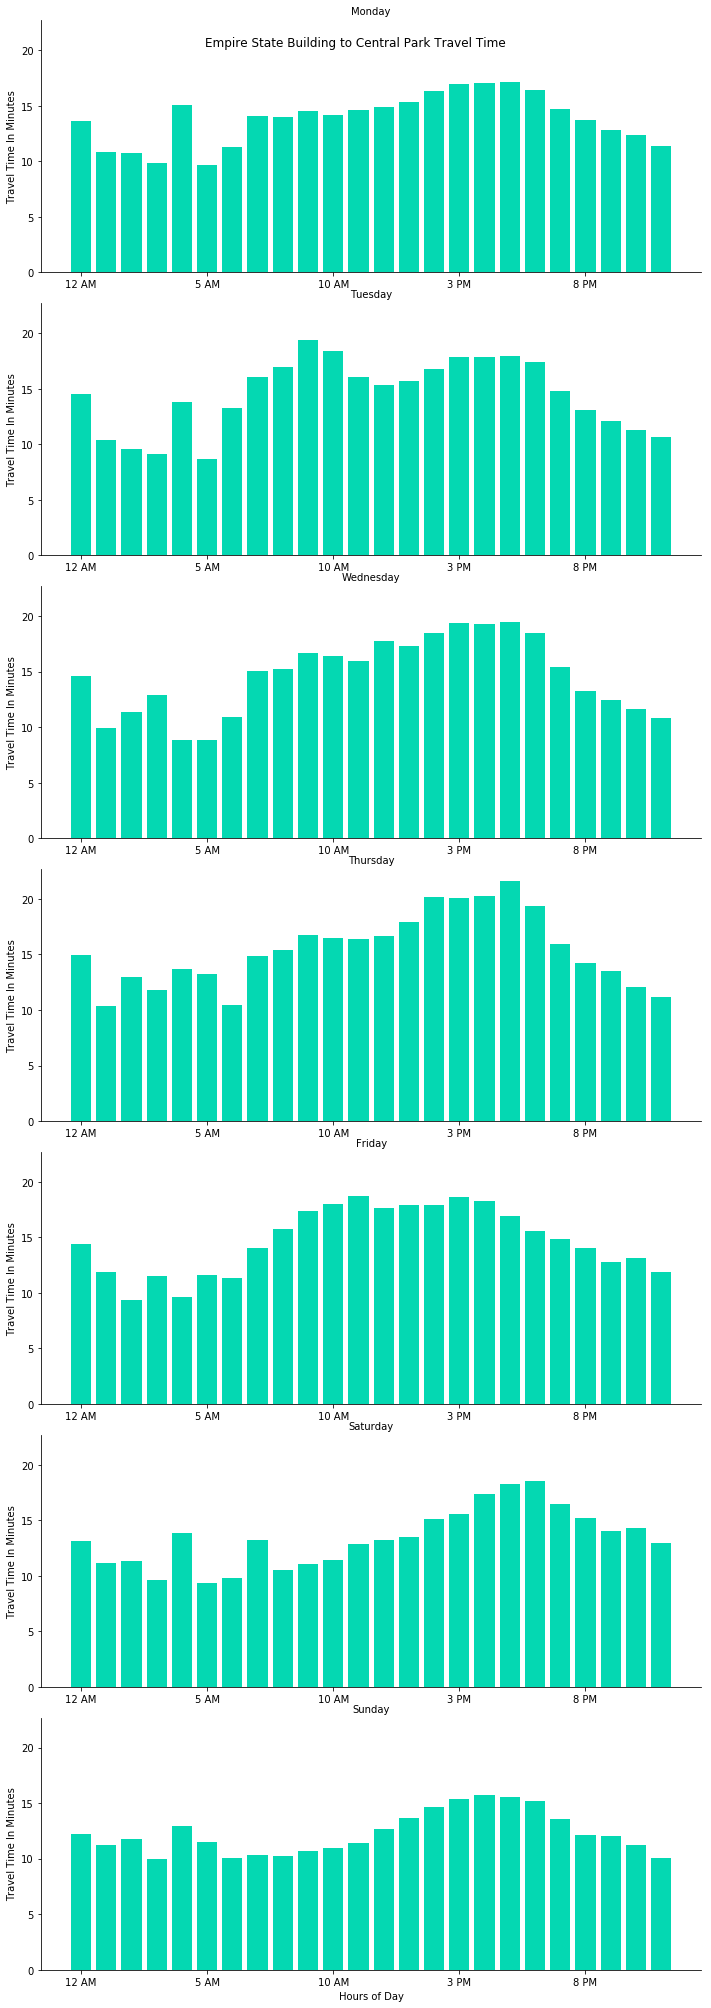

In [49]:
import seaborn as sns
g = sns.FacetGrid(travel_data, col="dow_words", col_wrap=1,height=4, aspect=2.5)
g = (g.map(plt.bar, 'hour', 'travel_time', color=sns.xkcd_rgb['aquamarine'])).set_titles('{col_name}')
g.set_xlabels('Hours of Day')
g.set_ylabels('Travel Time In Minutes')

for ax in g.axes.flat:
    _ = plt.setp(ax.get_xticklabels(), visible=True)
g.set_xticklabels(['12 AM','12 AM', '5 AM', '10 AM', '3 PM', '8 PM'])
g.fig.suptitle('Empire State Building to Central Park Travel Time');


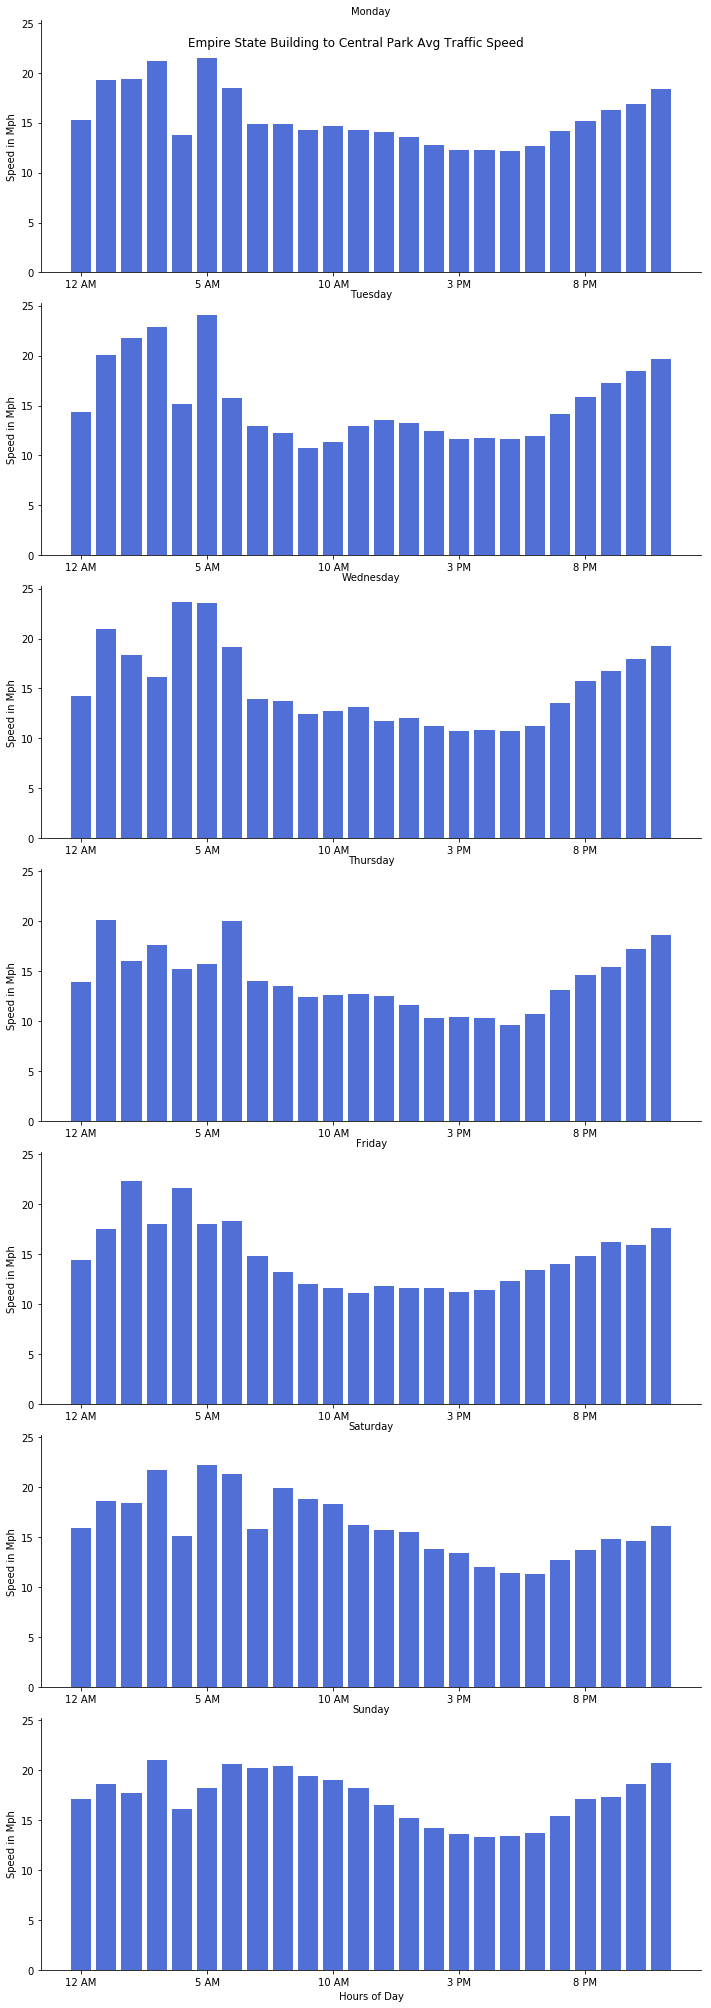

In [51]:
g = sns.FacetGrid(travel_data, col="dow_words", col_wrap=1,height=4, aspect=2.5)
g = (g.map(plt.bar, 'hour', 'avg_speed', color=sns.xkcd_rgb["cornflower blue"])).set_titles('{col_name}')
g.set_xlabels('Hours of Day')
g.set_ylabels('Speed in Mph')

for ax in g.axes.flat:
    _ = plt.setp(ax.get_xticklabels(), visible=True)
g.set_xticklabels(['12 AM','12 AM', '5 AM', '10 AM', '3 PM', '8 PM'])
g.fig.suptitle('Empire State Building to Central Park Avg Traffic Speed');